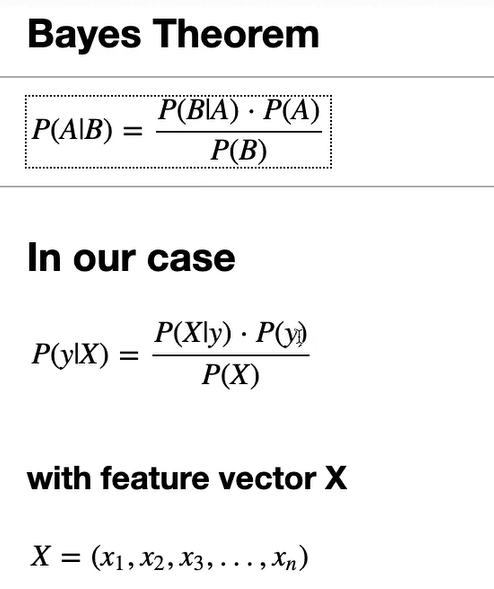

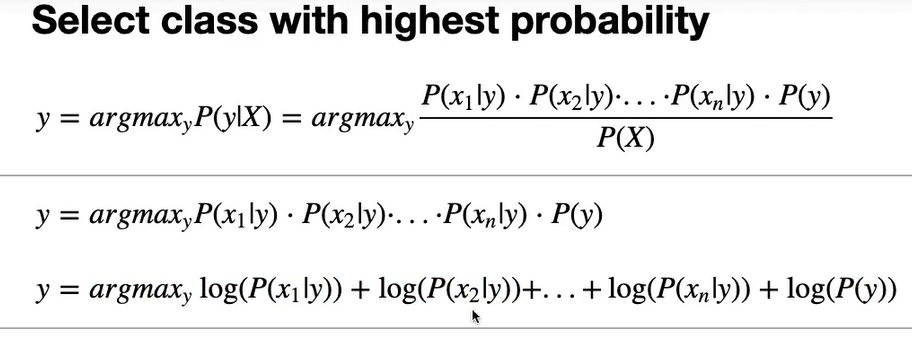

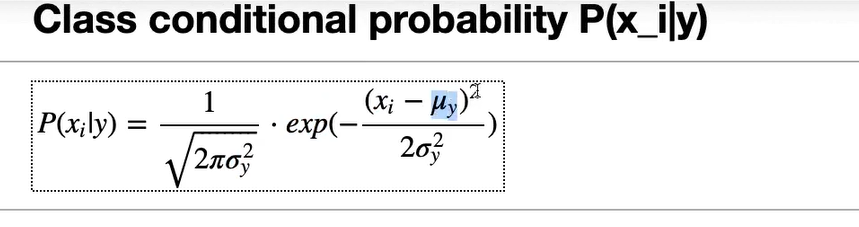

Here the guassion distribution formula standard deviation is o, variance is o2

In [7]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

In [8]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


X_test

array([[-1.18969436, -1.11808378, -0.94159977, ...,  1.14573172,
        -1.28687448,  0.00287192],
       [-0.12141952,  0.93394528, -0.79099431, ...,  0.9409656 ,
         0.20236666,  0.13396693],
       [ 0.52359715,  0.52098609,  0.16096703, ..., -1.77990456,
        -1.80780202,  0.21224739],
       ...,
       [ 0.09530756, -1.66196257,  0.31989929, ...,  0.07960368,
        -0.45841183, -0.43239808],
       [-0.12320826, -2.32168059,  0.38615049, ..., -0.71392573,
         2.23493369, -0.18787433],
       [-0.02315552,  0.17759446, -0.6534841 , ..., -0.44552572,
        -0.83767918, -0.75642214]])

In [9]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0])

In [12]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        self.mu = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)
        
        for index, C_value in enumerate(self.classes):
            X_class = X[y==C_value]
            self.mu[index, :] = X_class.mean(axis=0)
            self.var[index,:] = X_class.var(axis=0)
            self.priors[index] = X_class.shape[0]/float(n_samples)
    def PDF(self, class_index, x):
        mu = self.mu[class_index]
        var = self.var[class_index]
        numerator = np.exp(-((x-mu)**2) / (2*var))
        denominator = np.sqrt(2*np.pi*var)
        return numerator / denominator
    
    def predict(self, X):
        y_preds = []
        for x in X:
            posteriors = []
            for index, C_value in enumerate(self.classes):
                prior = np.log(self.priors[index])
                posterior = np.sum(np.log(self.PDF(index, x)))
                guassion = prior + posterior
                posteriors.append(guassion)# [p(class_0), p(class_1)]
            y_pred = self.classes[np.argmax(posteriors)]
            y_preds.append(y_pred)
        return y_preds
    

In [13]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965


In [14]:
print(predictions)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]


In [15]:
print(y_test)

[0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0
 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0]
